# Customer Attrition Prediction

In [2]:
#Importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading the dataset
df = pd.read_csv("churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4773,8627-EHGIP,Male,0,No,No,44,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Mailed check,53.95,2375.4,Yes
6961,8155-IBNHG,Female,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.40,1747.85,Yes
281,8229-MYEJZ,Female,0,No,No,10,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,51.20,498.25,No
2734,2371-JUNGC,Male,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,208,No
6122,7609-NRNCA,Female,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.55,280.85,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
#imbalanced dataset
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

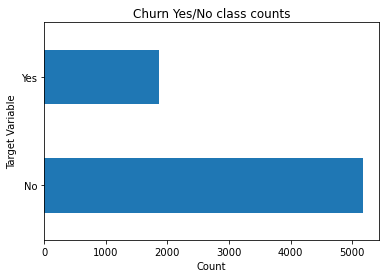

In [10]:
#plot for targer variable class counts
df['Churn'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Churn Yes/No class counts");

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning

In [13]:
data=df.copy()

In [14]:
#Converting total charges to numeric then checking for null values
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
data.loc[data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
#Since less missing values we remove those rows - .15%
data.dropna(how = 'any', inplace = True)

In [17]:
df['tenure'].max() #max tenure

72

In [18]:
#Grouping tenure in bins of 12
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [20]:
#Removing unnecessary columns
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

# Data Exploration

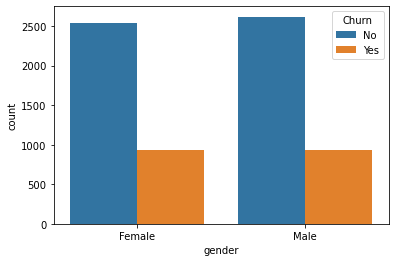

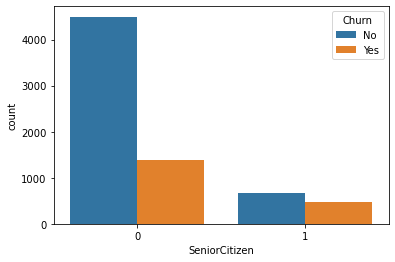

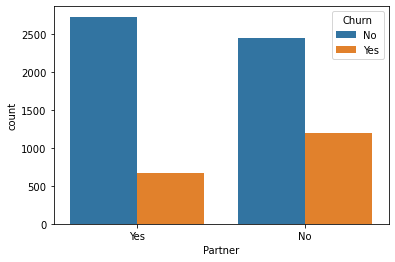

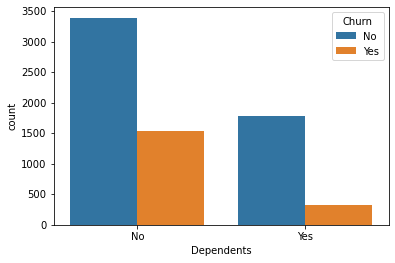

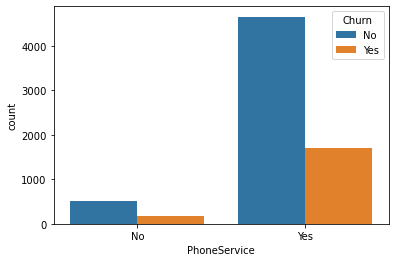

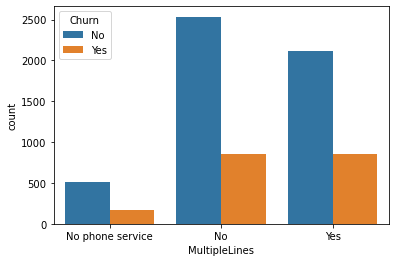

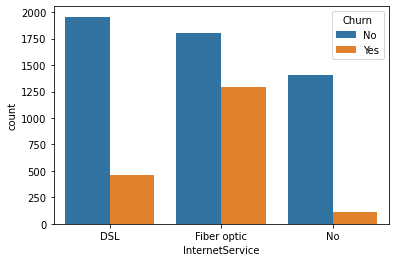

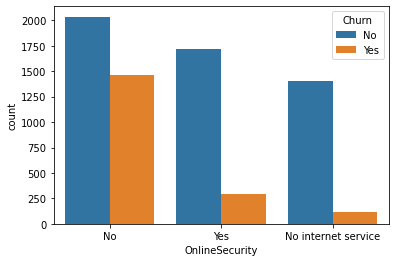

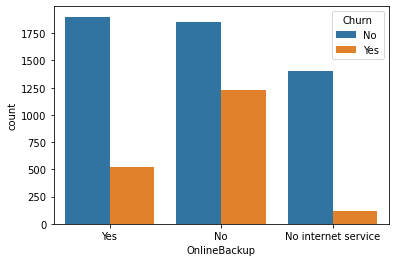

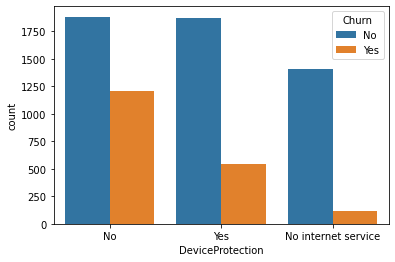

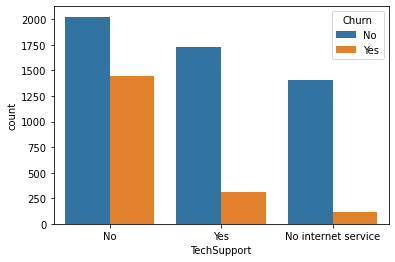

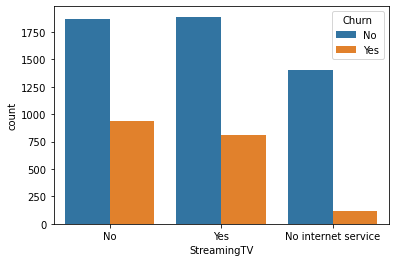

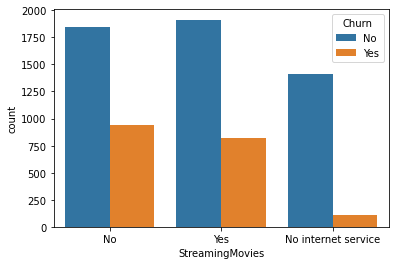

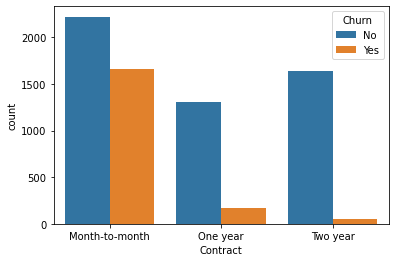

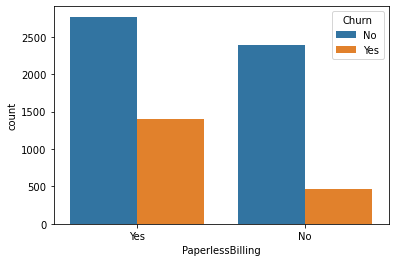

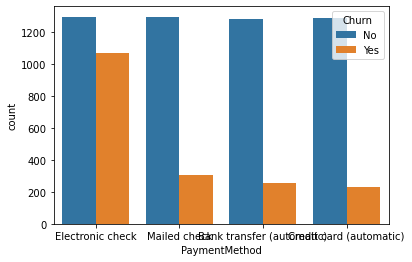

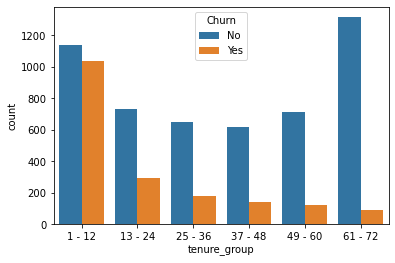

In [23]:
#Univariate Analysis

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

In [24]:
#Target to binary numeric value
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [25]:
#For binary values we can also set directly as 1 or 0, Here one hot encoding
data1 = pd.get_dummies(data)

In [26]:
data1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


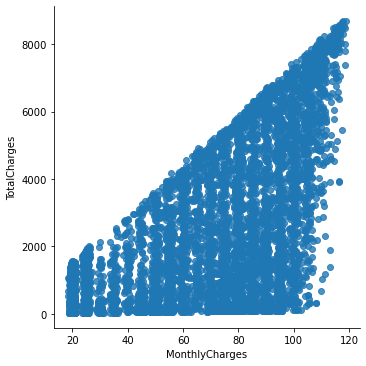

In [27]:
#Relationship between total and monthly charges
sns.lmplot(data=data1, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

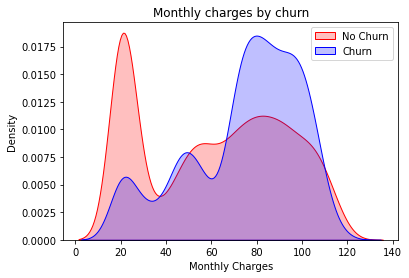

In [28]:
Mth = sns.kdeplot(data1.MonthlyCharges[(data1["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data1.MonthlyCharges[(data1["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

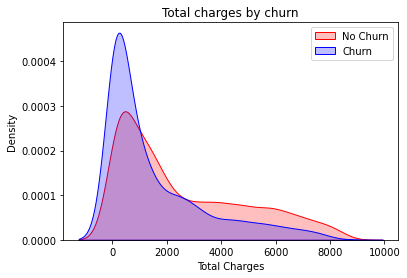

In [29]:
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

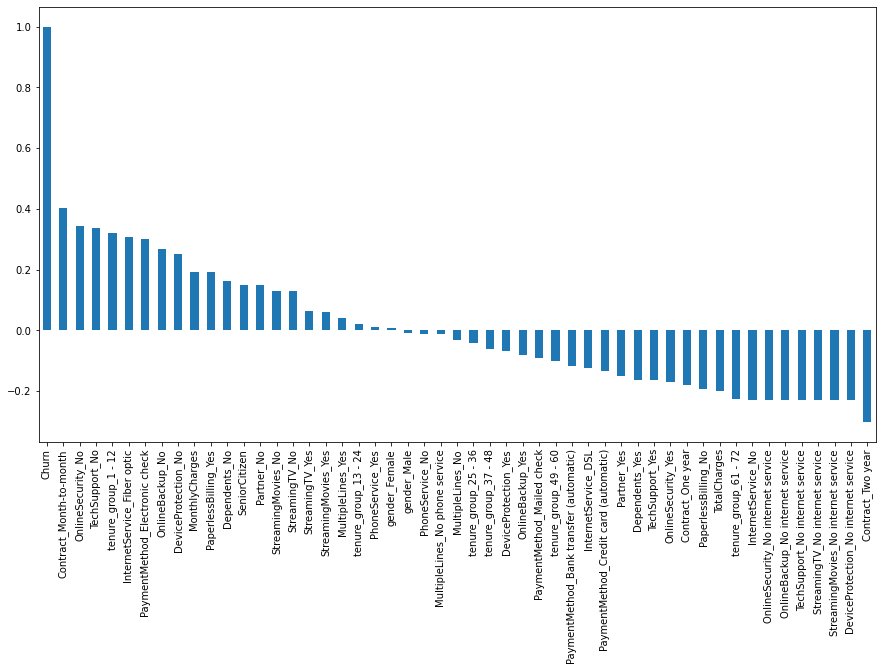

In [30]:
#Correlation
plt.figure(figsize=(15,8))
data1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

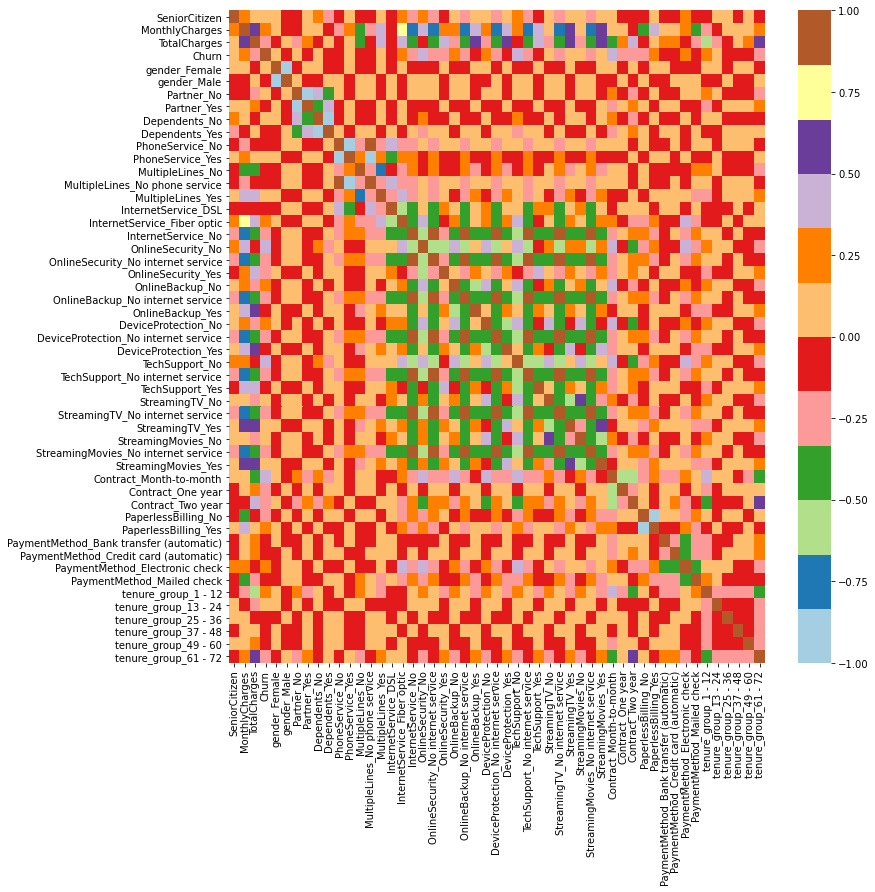

In [31]:
#Can also be inferred using heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(), cmap="Paired")

In [32]:
#Bivariate analysis

dt0=data.loc[data["Churn"]==0]
dt1=data.loc[data["Churn"]==1]

In [43]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

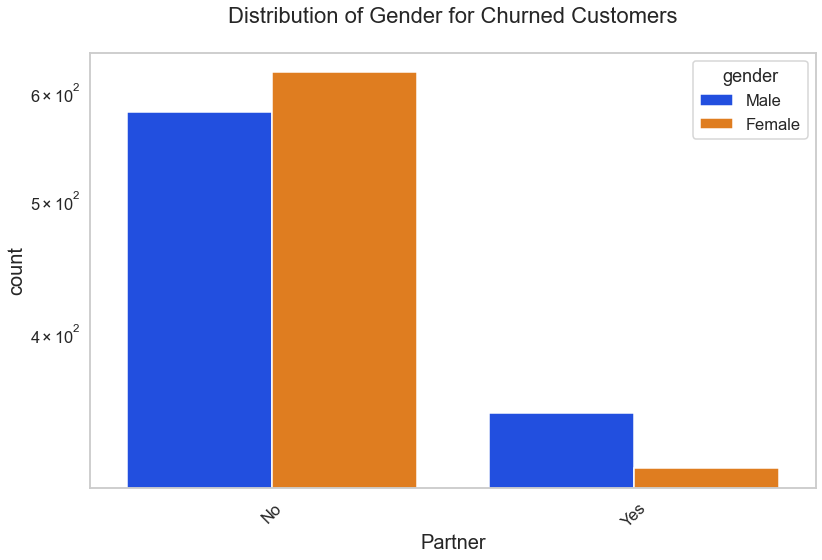

In [44]:
uniplot(dt1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

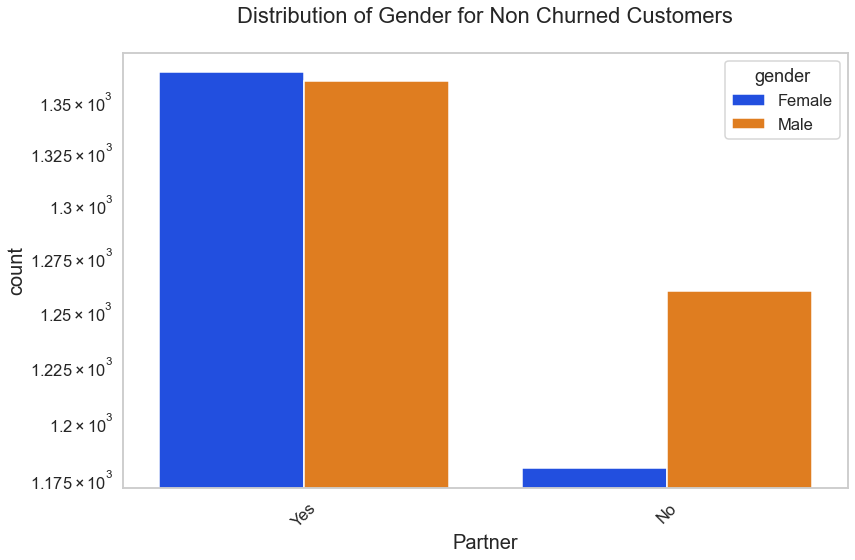

In [45]:
uniplot(dt0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

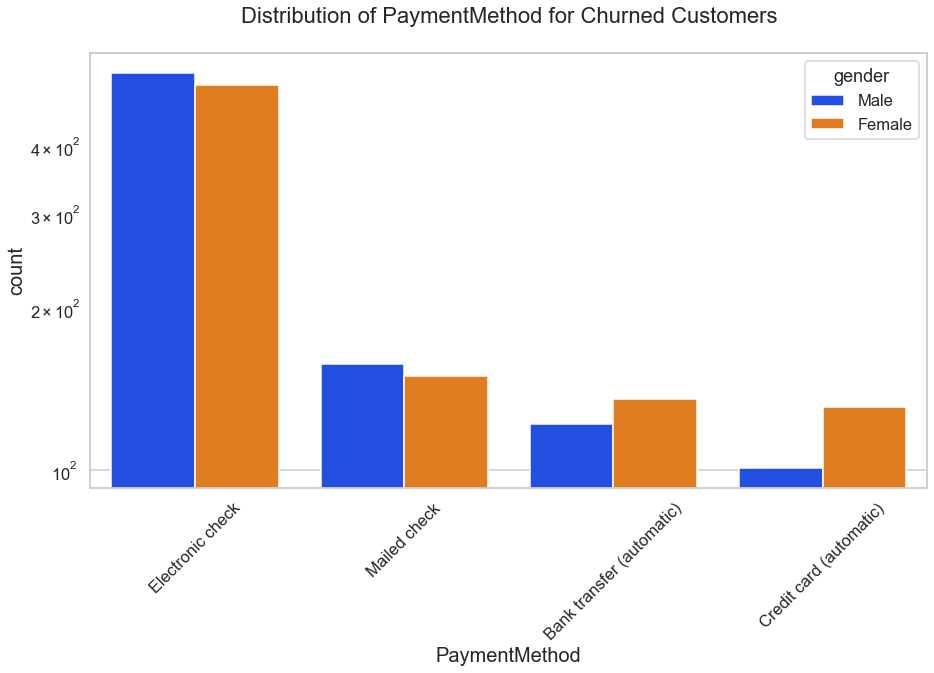

In [46]:
uniplot(dt1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

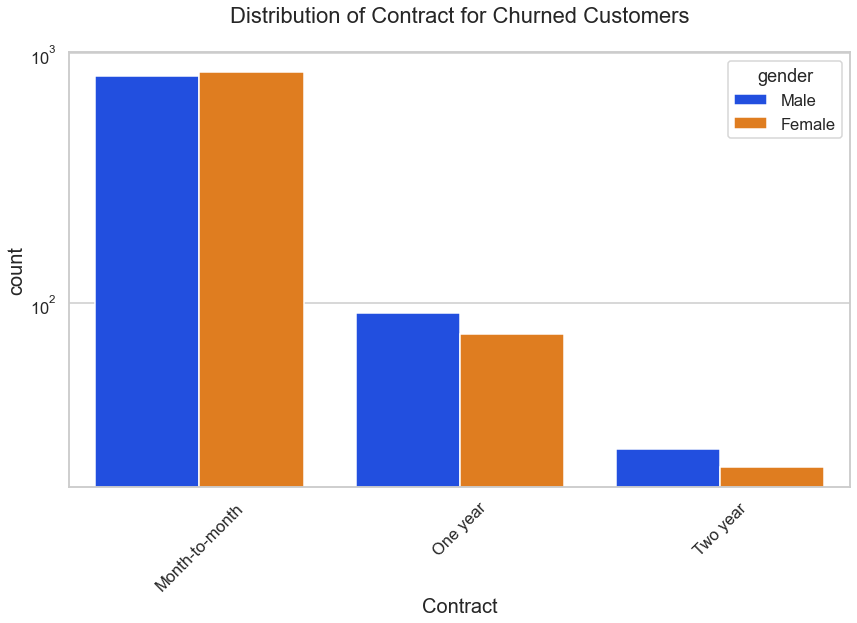

In [47]:
uniplot(dt1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

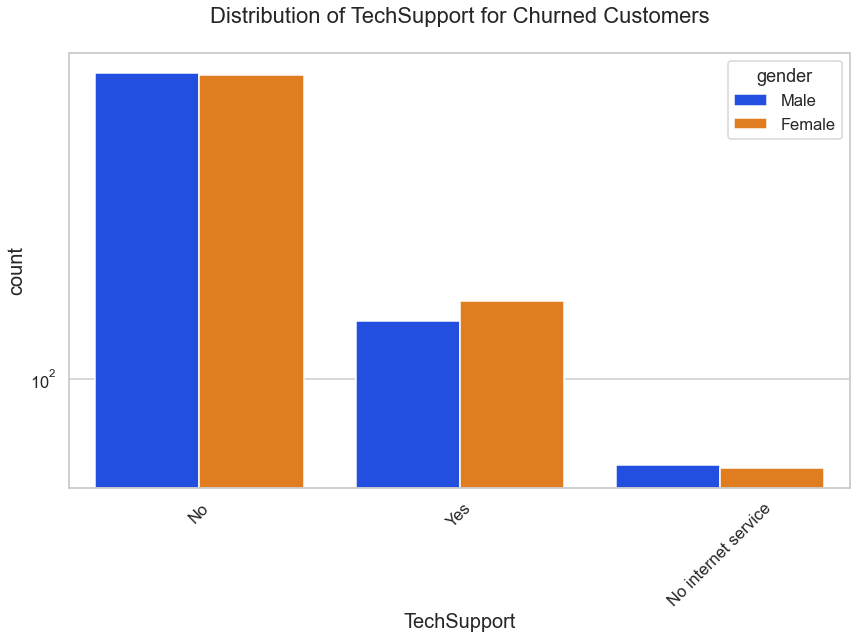

In [48]:
uniplot(dt1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

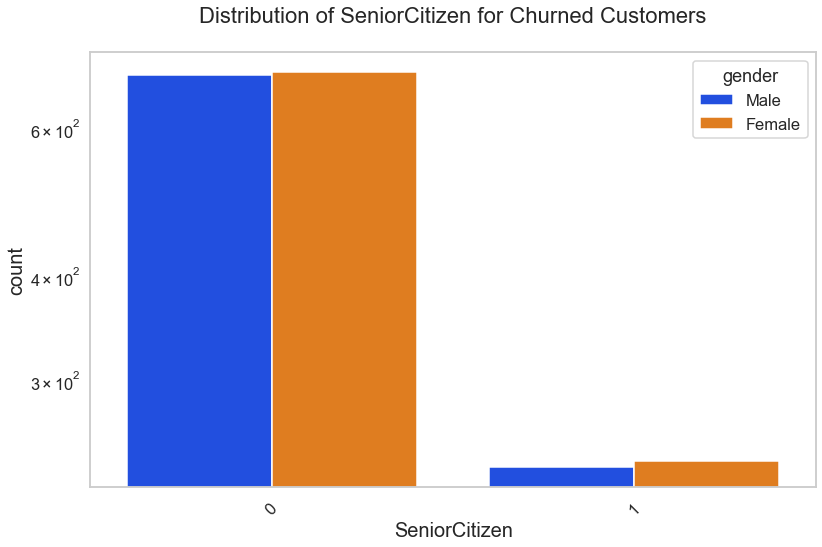

In [49]:
uniplot(dt1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [50]:
data1.to_csv('churnds.csv')

# Model Building

In [59]:
#Importing necessary libraries for model building
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [89]:
import warnings 
warnings.filterwarnings("ignore")

In [52]:
#Loadingthe preprocessed data
df=pd.read_csv("churnds.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [53]:
df=df.drop('Unnamed: 0',axis=1)

In [54]:
#Scaling monthly and total charges
cols = ['MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [55]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [56]:
#Oversampling using SMOTE and cleaning using ENN.
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

In [57]:
#Resampled data
X, Y = sm.fit_sample(x,y)

In [83]:
#Train test split
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.2)

In [84]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model1=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

model1.fit(x_train,y_train)

y_predict1 = model1.predict(x_test)

In [85]:
model_score1 = model1.score(x_test, y_test)
print("Accuracy: ",model_score1)
print("\nClassification report:\n\n",metrics.classification_report(y_test, y_predict1))

Accuracy:  0.9203821656050956

Classification report:

               precision    recall  f1-score   support

           0       0.94      0.87      0.90       539
           1       0.91      0.96      0.93       717

    accuracy                           0.92      1256
   macro avg       0.92      0.91      0.92      1256
weighted avg       0.92      0.92      0.92      1256



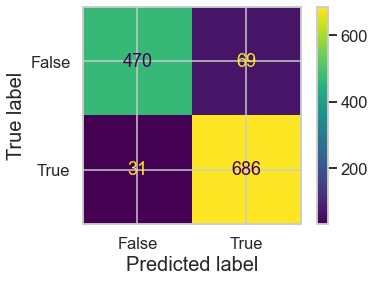

In [109]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [87]:
#xgboost
from xgboost import XGBClassifier

model2 = XGBClassifier()

model2.fit(x_train,y_train)

y_predict2 = model2.predict(x_test)

In [88]:
model_score2 = model2.score(x_test, y_test)
print("Accuracy: ",model_score2)
print("\nClassification report:\n\n",metrics.classification_report(y_test, y_predict2))

Accuracy:  0.9713375796178344

Classification report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       539
           1       0.97      0.98      0.97       717

    accuracy                           0.97      1256
   macro avg       0.97      0.97      0.97      1256
weighted avg       0.97      0.97      0.97      1256



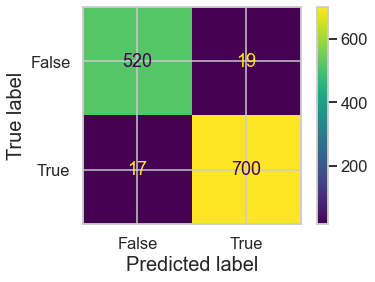

In [108]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [105]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()

model3.fit(x_train,y_train)

y_predict3 = model3.predict(x_test)

In [106]:
model_score3 = model3.score(x_test, y_test)
print("Accuracy: ",model_score3)
print("\nClassification report:\n\n",metrics.classification_report(y_test, y_predict3))

Accuracy:  0.9514331210191083

Classification report:

               precision    recall  f1-score   support

           0       0.94      0.94      0.94       539
           1       0.96      0.96      0.96       717

    accuracy                           0.95      1256
   macro avg       0.95      0.95      0.95      1256
weighted avg       0.95      0.95      0.95      1256



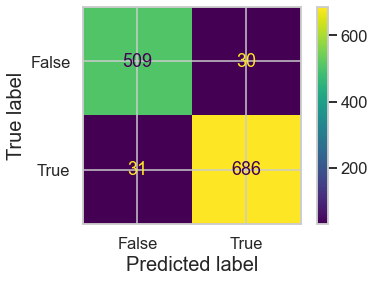

In [110]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [111]:
import pickle

In [112]:
pickle.dump(model1, open('RandomForest.pkl', 'wb'))

In [113]:
pickle.dump(model2, open('XGBoost.pkl', 'wb'))

In [115]:
pickle.dump(model3, open('LogisticRegression.pkl', 'wb'))